## Load Data from CSVs

In [249]:
import unicodecsv
import seaborn as sns
## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [250]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
    
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

## Fixing Data Types

In [251]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [252]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [253]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [254]:
#Remover coluna acct do daily engagement

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [255]:
def get_unique_students(data):
    estudantes_unicos = set()
    for item in data:
        estudantes_unicos.add(item['account_key'])
    
    return estudantes_unicos

## Investigating the Data

#### Alunos únicos engajamento

In [256]:
dailys_keys = get_unique_students(daily_engagement)

len(dailys_keys)

1237

#### Alunos únicos submissões

In [257]:
submissions_keys = get_unique_students(project_submissions)

len(set(submissions_keys))

743

#### Inscrições únicas

In [258]:
enrolments_keys = get_unique_students(enrollments)

len(set(enrolments_keys))

1302

#### Dados não correspondentes entre a tabela de inscrições e a tabela de engajamento diário

In [259]:
conteudo = ''
for linha in enrolments_keys: 
    if(linha not in dailys_keys):
        conteudo = linha
        break
    
    
conteudo

'750'

In [260]:
list(filter(lambda x: x['account_key'] == '717', enrollments))

[OrderedDict([('account_key', '717'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2014, 12, 4, 0, 0)),
              ('cancel_date', datetime.datetime(2014, 12, 4, 0, 0)),
              ('days_to_cancel', 0),
              ('is_udacity', False),
              ('is_canceled', True)])]

#### Validando se existe alguma data de inscrição maior que a data de cancelamento nas inscrições

In [261]:
linhas_invalidas_data_maior = []
for inscricao in enrollments:
    if(inscricao['cancel_date'] != None and inscricao['join_date'] > inscricao['cancel_date']):
        linhas_invalidas_data_maior.append(inscricao)
        
linhas_invalidas_data_maior

[]

#### Validando se existe alguma data de cancelamento preenchido e is_canceled é false nas inscrições

In [262]:
linhas_invalidas_is_canceled = []
for inscricao in enrollments:
    if(inscricao['cancel_date'] == None and inscricao['cancel_date'] != None):
        linhas_invalidas_is_canceled.append(inscricao)
        
linhas_invalidas_is_canceled

[]

#### Validando se existe alguma data de criação maior que a data de finalização em project_submissions

In [263]:
linhas_invalidas_completionDate_createDate = []
vai = ''
for envio in project_submissions:
    if(envio['completion_date'] != None and envio['completion_date'] < envio['creation_date']):
        linhas_invalidas_completionDate_createDate.append(inscricao)
        
linhas_invalidas_completionDate_createDate

[]

#### Validando se existe alguma inscrição que não consta na tabela de enrollments

In [264]:
alunos_problema = 0

for inscricao in enrollments:
    if(inscricao['account_key'] not in dailys_keys and inscricao['join_date'] != inscricao['cancel_date']):
        print(inscricao)
        alunos_problema += 1

alunos_problema

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

#### Removendo contas teste da udacity

In [265]:
contas_teste_udacity = set()

for item in enrollments:
    if(item['is_udacity']):
        contas_teste_udacity.add(item['account_key'])
        
len(contas_teste_udacity)

6

In [266]:
def remover_dados_teste_udacity(data):
    dados_limpos = []
    for item in data:
        if(item['account_key'] not in contas_teste_udacity):
            dados_limpos.append(item)
            
    return dados_limpos

In [267]:
enrollments_limpos = remover_dados_teste_udacity(enrollments)
daily_engagement_limpos = remover_dados_teste_udacity(daily_engagement)
project_submissions_limpos = remover_dados_teste_udacity(project_submissions)

print(len(enrollments_limpos))
print(len(daily_engagement_limpos))
print(len(project_submissions_limpos))

1622
135656
3634


In [268]:
from statistics import mean

#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

submissions = []
tempo_medio_submissao = []
for submission in project_submissions:
    submissions.append(submission['account_key'])
    if(submission['completion_date'] != None and submission['creation_date'] != None):
        tempo_medio_submissao.append((submission['completion_date'] -  submission['creation_date']).days)



enrolments_keys = []
dias_para_cancelar = []
for enrolment in enrollments:
    enrolments_keys.append(enrolment['account_key'])
    if(enrolment['days_to_cancel'] != None):
        dias_para_cancelar.append(enrolment['days_to_cancel'])
    
    
# Média de dias que uma pessoa leva para cancelar a inscrição:
 
mediaDiasParaCancelar = mean(dias_para_cancelar)
mediaDiasParaSubmissao = mean(tempo_medio_submissao)
print('Dias para cancelar: ' + str(mediaDiasParaCancelar))
print('Dias para submissao: ' + str(mediaDiasParaSubmissao))
    

print(len(set(enrolments_keys)))


print('############')

print(len(enrollments))
print(len(project_submissions))
print(len(daily_engagement))


Dias para cancelar: 43.917004048582996
Dias para submissao: 3.531903190319032
1302
############
1640
3642
136240


In [269]:
daily_engagement[0]['account_key']

'0'

## Problems in the Data

In [270]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [271]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

## Checking for More Problem Records

In [272]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## Tracking Down the Remaining Problems

In [273]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [274]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [275]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [276]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for inscricao in non_udacity_enrollments:
    if(inscricao['days_to_cancel'] is None or inscricao['days_to_cancel'] > 7):
        key = inscricao['account_key']
        value = inscricao['join_date']
        
        if(key not in paid_students or value > paid_students[key]):
            paid_students[key] = value
            
len(paid_students)

995

## Getting Data from First Week

In [277]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students: 
            new_data.append(data_point) 
            
    return new_data

In [278]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [279]:
for item in paid_engagement:
    registro = item
    if registro['num_courses_visited'] > 0:
        registro['has_visited'] = 1
    else:
        registro['has_visited'] = 0

In [280]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


paid_engagement_in_first_week = []

for item in paid_engagement:   
    account_key = item['account_key']
    join_date = paid_students[account_key]
    if(within_one_week(join_date, item['utc_date'])):
        paid_engagement_in_first_week.append(item)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [281]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [282]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)


import matplotlib.pyplot as plt
import numpy as np

def obter_metricas(dataset, valor_para_agrupar):
    total_items_by_account = {}
    for account_key, engagement_for_student in dataset.items():
        total_items = 0
        for engagement_record in engagement_for_student:
            total_items += engagement_record[valor_para_agrupar]
        total_items_by_account[account_key] = total_items        
    lista = list(total_items_by_account.values())

# Summarize the data about minutes spent in the classroom
    print('Mean:', np.mean(lista))
    print('Standard deviation:', np.std(lista))
    print('Minimum:', np.min(lista))
    print('Maximum:', np.max(lista))
    plt.ylabel('Quantidade')
    plt.xlabel(valor_para_agrupar)
    plt.hist(lista)
    


Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


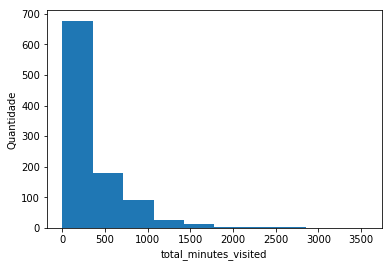

In [283]:
obter_metricas(engagement_by_account, 'total_minutes_visited')

## Debugging Data Analysis Code

In [211]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

In [212]:
## Identificando item que possui mais de uma semana em minutos

#for account_key, minutes in total_minutes_by_account.items():
#    if minutes >= 10000:
#        print(account_key, minutes)

In [213]:
engagement_by_account['108']

[OrderedDict([('utc_date', datetime.datetime(2015, 4, 20, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 25.9137858334),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '108'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 4, 21, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 3.40682316667),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '108'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetime(2015, 4, 22, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 99.1186611667),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '108'),
              ('has_visited', 1)]),
 OrderedDict([('utc_date', datetime.datetim

In [106]:
for item in non_udacity_enrollments:
    if item['account_key'] == '108':
        print(item)

OrderedDict([('account_key', '108'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 7, 0, 0)), ('cancel_date', datetime.datetime(2015, 4, 20, 0, 0)), ('days_to_cancel', 103), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '108'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 4, 20, 0, 0)), ('cancel_date', datetime.datetime(2015, 5, 14, 0, 0)), ('days_to_cancel', 24), ('is_udacity', False), ('is_canceled', True)])


In [107]:
paid_students['108']

datetime.datetime(2015, 4, 20, 0, 0)

In [108]:
for item in paid_engagement_in_first_week:
    if item['account_key'] == '108':
        print(item)

OrderedDict([('utc_date', datetime.datetime(2015, 4, 20, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 25.9137858334), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 21, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 3.40682316667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 22, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 99.1186611667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 23, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 35.8316206667), ('lessons_completed', 0), ('projects_completed', 2), ('account_key', '108'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 4, 24, 0, 0)), ('n

## Lessons Completed in First Week

In [109]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

In [110]:
obter_metricas(engagement_by_account, 'lessons_completed')

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [111]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [113]:
obter_metricas(engagement_by_account, 'has_visited')

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [125]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

alunos_que_passaram = set()

for item in paid_submissions:
        if item['lesson_key'] in subway_project_lesson_keys and (item['assigned_rating'] == 'PASSED' or item['assigned_rating'] == 'DISTINCTION'):
           alunos_que_passaram.add(item['account_key'])       

len(alunos_que_passaram)

647

In [126]:
passing_engagement = []
non_passing_engagement = []

for item in paid_engagement_in_first_week:
    if item['account_key'] in alunos_que_passaram:
        passing_engagement.append(item)        
    else:
        non_passing_engagement.append(item)
            
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [128]:
passing_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0'),
             ('has_visited', 1)])

In [149]:
from collections import defaultdict

estudantes_que_passaram = defaultdict(list)
estudantes_que_nao_passaram = defaultdict(list)

for item in passing_engagement:
    account_key = item['account_key']
    estudantes_que_passaram[account_key].append(item)
    
for item in non_passing_engagement:
    account_key = item['account_key']
    estudantes_que_nao_passaram[account_key].append(item)

PASSARAM

Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


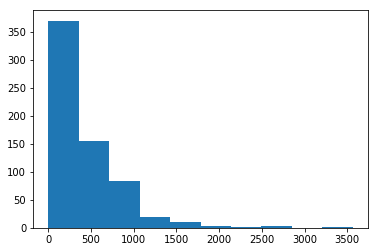

In [163]:
print('PASSARAM\n')
obter_metricas(estudantes_que_passaram, 'total_minutes_visited')


NÃO PASSARAM

Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


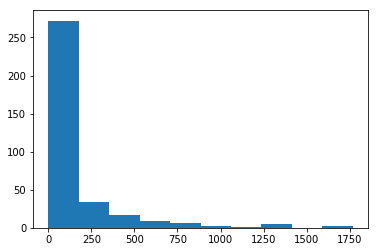

In [164]:
print('\nNÃO PASSARAM\n')
obter_metricas(estudantes_que_nao_passaram, 'total_minutes_visited')

PASSARAM

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


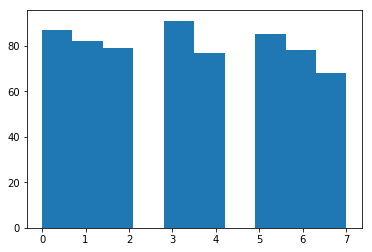

In [165]:
print('PASSARAM\n')
obter_metricas(estudantes_que_passaram, 'has_visited')


NÃO PASSARAM

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


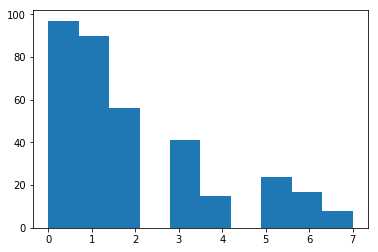

In [166]:
print('\nNÃO PASSARAM\n')
obter_metricas(estudantes_que_nao_passaram, 'has_visited')

PASSARAM

Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


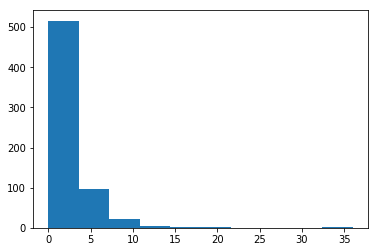

In [167]:
print('PASSARAM\n')
obter_metricas(estudantes_que_passaram, 'lessons_completed')


NÃO PASSARAM

Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


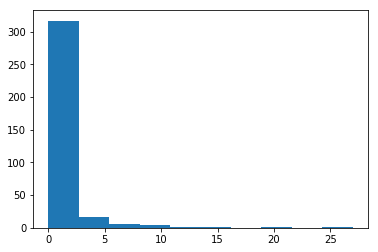

In [168]:
print('\nNÃO PASSARAM\n')
obter_metricas(estudantes_que_nao_passaram, 'lessons_completed')

PASSARAM

Mean: 0.00927357032457496
Standard deviation: 0.1108095723581757
Minimum: 0
Maximum: 2


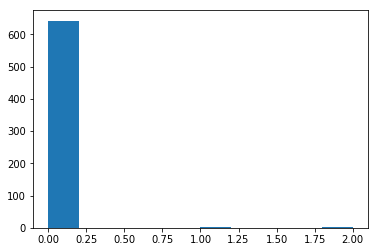

In [169]:
print('PASSARAM\n')
obter_metricas(estudantes_que_passaram, 'projects_completed')


NÃO PASSARAM

Mean: 0.0
Standard deviation: 0.0
Minimum: 0
Maximum: 0


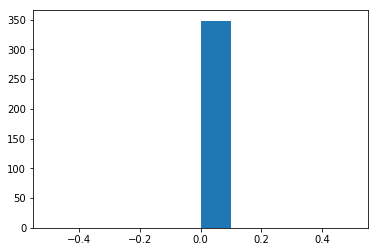

In [170]:
print('\nNÃO PASSARAM\n')
obter_metricas(estudantes_que_nao_passaram, 'projects_completed')

PASSARAM

Mean: 4.726429675425039
Standard deviation: 3.7002397793039687
Minimum: 0
Maximum: 25


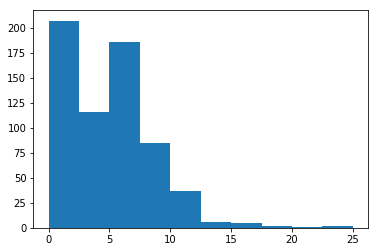

In [171]:
print('PASSARAM\n')
obter_metricas(estudantes_que_passaram, 'num_courses_visited')



NÃO PASSARAM

Mean: 2.589080459770115
Standard deviation: 2.906709690253102
Minimum: 0
Maximum: 18


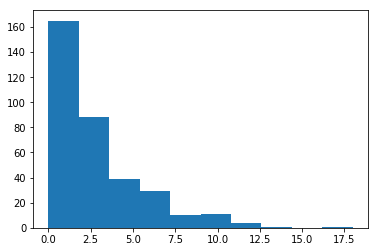

In [173]:
print('\nNÃO PASSARAM\n')
obter_metricas(estudantes_que_nao_passaram, 'num_courses_visited')

## Making Histograms

In [ ]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.